# review

In [30]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import numpy as np

In [22]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [24]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [25]:
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=40, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [28]:
y_pred = ppn.predict(X_test_std)
print("misclassified : ", (y_test != y_pred).sum())

misclassified :  4


In [33]:
print("acc : ", round(accuracy_score(y_test, y_pred),2))

acc :  0.91


# 03_Logistic Regression

$$\text{logitstic}(z) = \theta(z) = \dfrac{1}{1+\exp{(-z)}}$$

In [60]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline

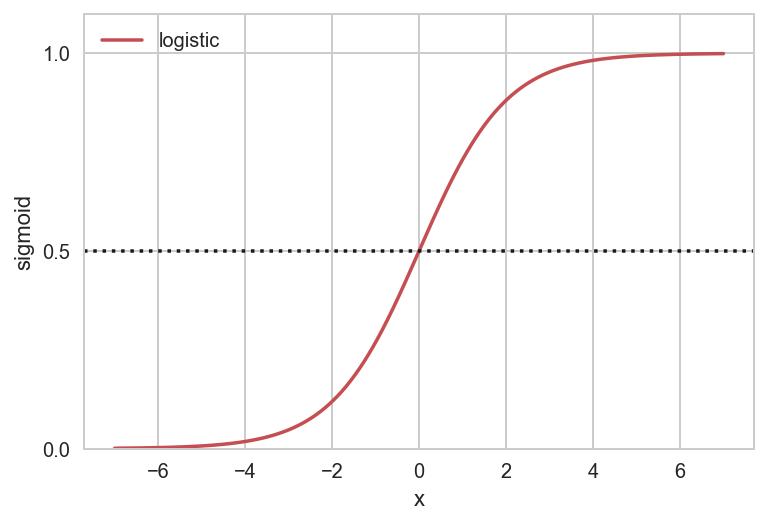

In [59]:
xx = np.linspace(-7, 7, 1000)
plt.plot(xx, 1/(1+np.exp(-xx)), 'r-', label="logistic")
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim([0.0, 1.1])
plt.legend(loc=2)
plt.xlabel("x")
plt.ylabel("sigmoid")
plt.show()

In [62]:
lr = LogisticRegression(C = 1000.0, random_state=0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [92]:
lr.predict(X_test_std)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0, 0])

In [94]:
(lr.predict(X_test_std) != y_test).sum()

1